# Importing Libraries and Dataset

In [270]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.simplefilter(action='ignore', category=Warning)

In [271]:
df = pd.read_csv('/kaggle/input/mobile-apps-screentime-analysis/screentime_analysis.csv')
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             200 non-null    object
 1   App              200 non-null    object
 2   Usage (minutes)  200 non-null    int64 
 3   Notifications    200 non-null    int64 
 4   Times Opened     200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [273]:
df.isnull().sum().sum()

0

In [274]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].min(), df['Date'].max()

(Timestamp('2024-08-01 00:00:00'), Timestamp('2024-08-30 00:00:00'))

In [275]:
df.columns

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened'], dtype='object')

In [276]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,200,2024-08-16 17:16:48,2024-08-01 00:00:00,2024-08-09 00:00:00,2024-08-18 00:00:00,2024-08-25 00:00:00,2024-08-30 00:00:00,NaN
Usage (minutes),200.0,37.75,1.0,17.0,26.0,51.25,119.0,29.711299
Notifications,200.0,28.735,0.0,1.75,11.5,47.0,147.0,35.801726
Times Opened,200.0,21.63,1.0,4.0,10.0,32.0,99.0,24.27301


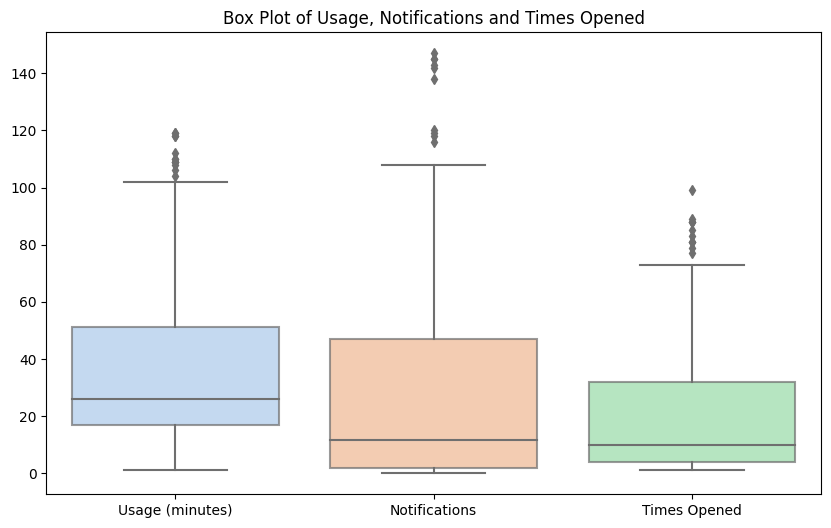

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = ['Usage (minutes)', 'Notifications', 'Times Opened']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns], palette="pastel", linewidth=1.5, boxprops=dict(alpha=0.7))
plt.title("Box Plot of Usage, Notifications and Times Opened")
plt.show()

As we can observe from this box plot, the Usage has the highest mean time in minutes in people's
screen time.

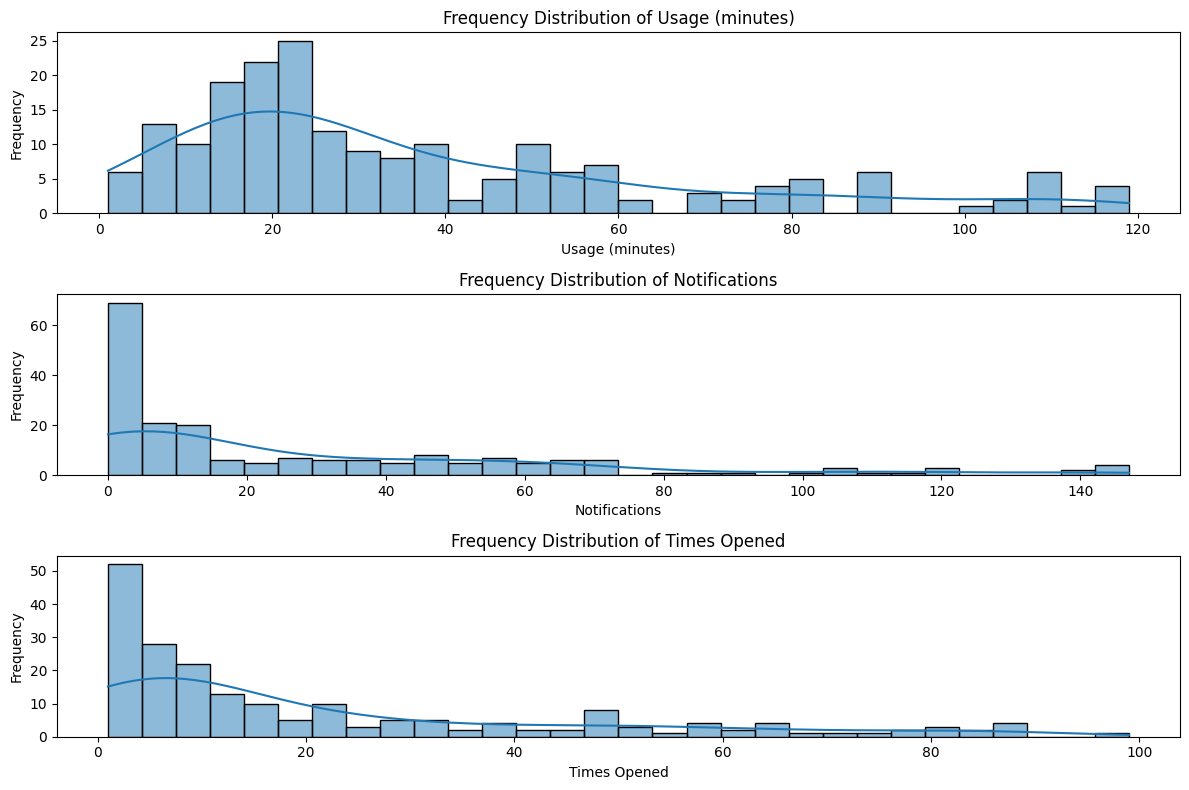

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = ['Usage (minutes)', 'Notifications', 'Times Opened']
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 1, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

From this frequency distribution graphs we can oberserve, that all of the columns i.e Usage,
times opened, and notification follow right skewed normal distribution with usage having the highest
mean time in minutes.

In [279]:
df['App'].value_counts()

App
Instagram      25
X              25
WhatsApp       25
8 Ball Pool    25
Safari         25
Netflix        25
Facebook       25
LinkedIn       25
Name: count, dtype: int64

In [280]:
df['day_of_week'] = df['Date'].dt.dayofweek
df["is_wknd"] = df['Date'].dt.weekday // 5

In [281]:
df_days = df.groupby(['is_wknd','day_of_week']).agg({'Usage (minutes)':'mean','Notifications':'mean',
'Times Opened':'mean'})

In [282]:
df_days.reset_index(inplace=True)

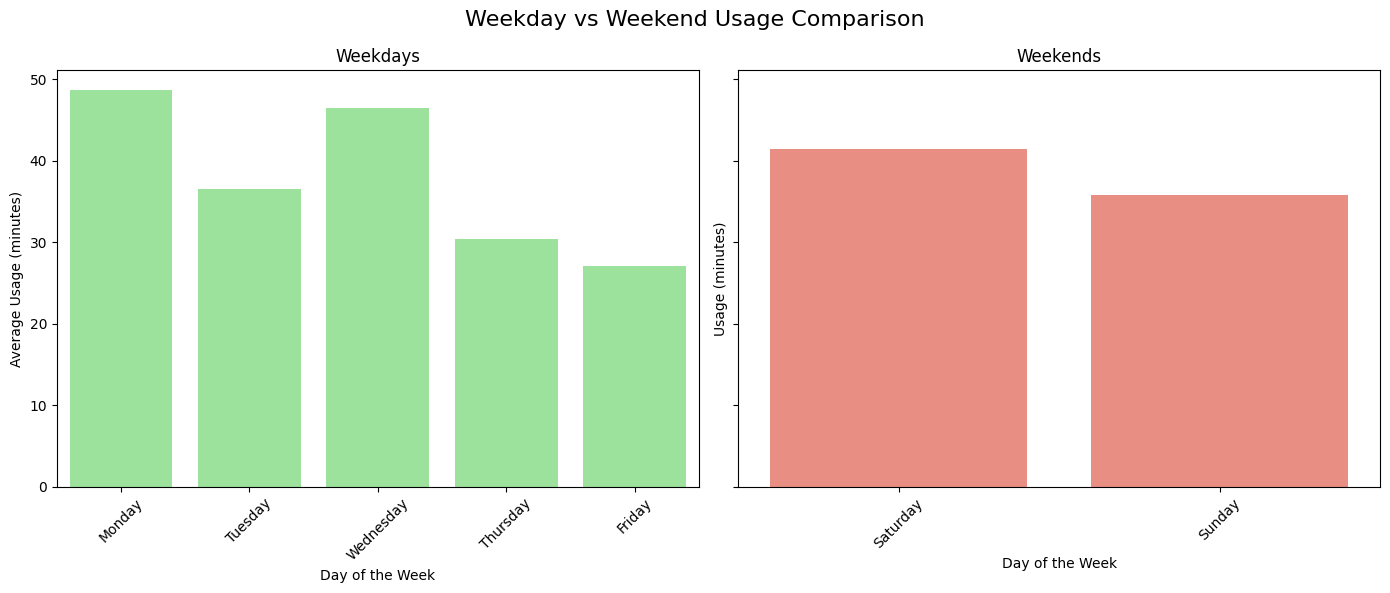

In [283]:
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_days['day_of_week'] = df_days['day_of_week'].map(day_names)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("Weekday vs Weekend Usage Comparison", fontsize=16)
sns.barplot(data=df_days[df_days['is_wknd'] == 0], x='day_of_week', y='Usage (minutes)', ax=axes[0], color='lightgreen')
axes[0].set_title("Weekdays")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Average Usage (minutes)")
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(data=df_days[df_days['is_wknd'] == 1], x='day_of_week', y='Usage (minutes)', ax=axes[1], color='salmon')
axes[1].set_title("Weekends")
axes[1].set_xlabel("Day of the Week")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

From this comparsion between the screen time on weekdays and weekends for usage shows us that 
people have a higher screen time on weekdays on an average than on the weekends, particularly 
monday and wednesday having the highest screen time in the whole week.

In [284]:
df_days

,is_wknd,day_of_week,Usage (minutes),Notifications,Times Opened
0,0,Monday,48.636364,31.363636,19.727273
1,0,Tuesday,36.541667,43.750000,25.500000
2,0,Wednesday,46.500000,31.272727,24.181818
3,0,Thursday,30.406250,19.093750,18.593750
4,0,Friday,27.085714,32.485714,24.285714
5,1,Saturday,41.441176,23.941176,24.294118
6,1,Sunday,35.750000,20.600000,13.000000


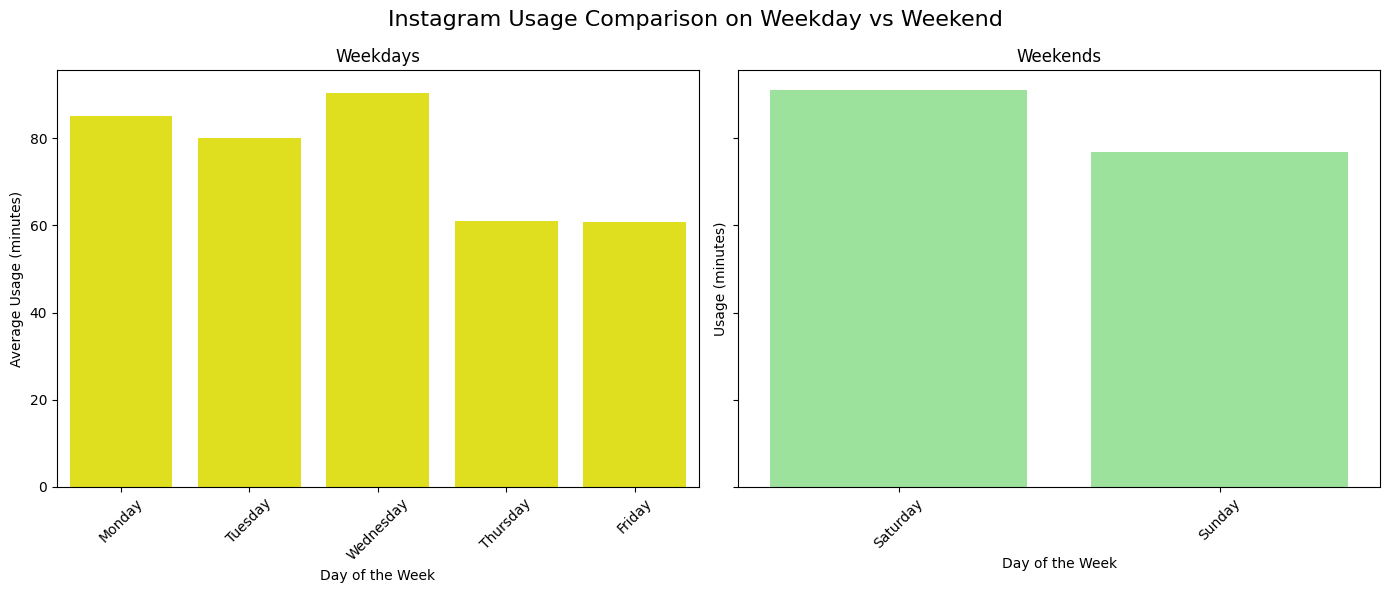

In [285]:
df_insta = df[df['App']=='Instagram']
df_days = df_insta.groupby(['is_wknd','day_of_week']).agg({'Usage (minutes)':'mean',
                                           'Notifications':'mean',
                                           'Times Opened':'mean'})
df_days.reset_index(inplace=True)
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_days['day_of_week'] = df_days['day_of_week'].map(day_names)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("Instagram Usage Comparison on Weekday vs Weekend", fontsize=16)
sns.barplot(data=df_days[df_days['is_wknd'] == 0], x='day_of_week', y='Usage (minutes)', ax=axes[0], color='yellow')
axes[0].set_title("Weekdays")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Average Usage (minutes)")
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(data=df_days[df_days['is_wknd'] == 1], x='day_of_week', y='Usage (minutes)', ax=axes[1], color='lightgreen')
axes[1].set_title("Weekends")
axes[1].set_xlabel("Day of the Week")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

From this comparsion between the screen time on weekdays and weekends for instagram shows us that 
people have a higher screen time on weekends on an average than on the weekdays, particularly 
saturday having the highest screen time on insatgram in the whole week.

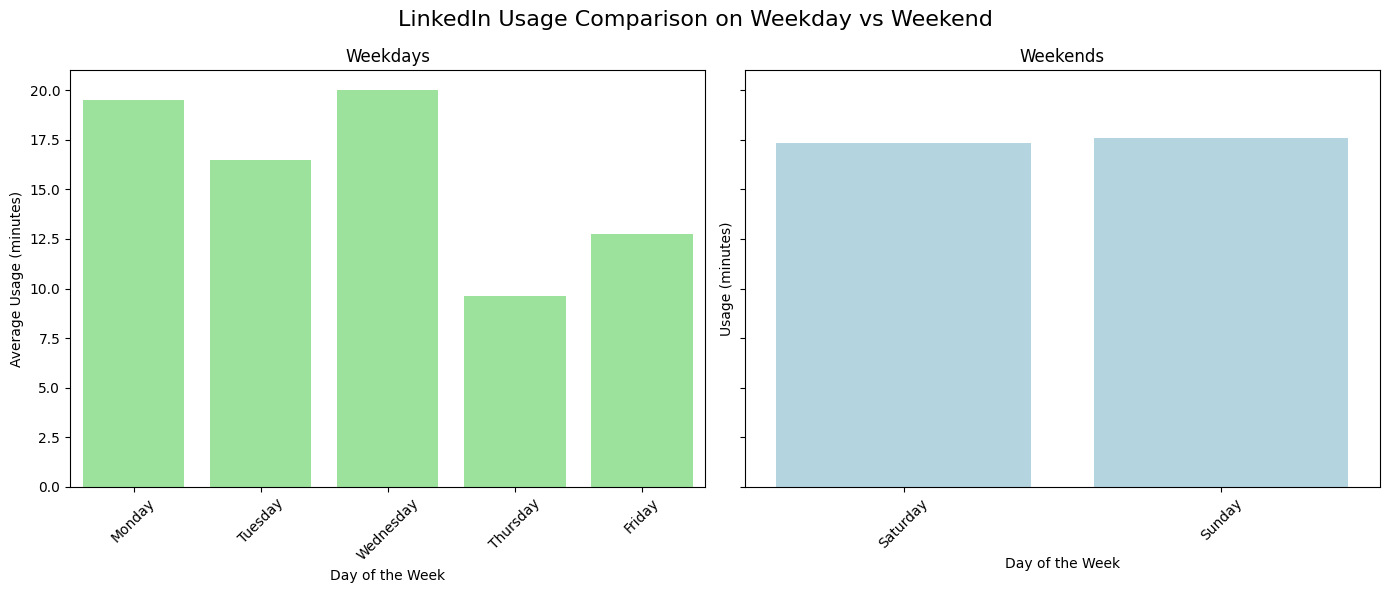

In [286]:
df_linkedin = df[df['App']=='LinkedIn']
df_days = df_linkedin.groupby(['is_wknd','day_of_week']).agg({'Usage (minutes)':'mean',
                                           'Notifications':'mean',
                                           'Times Opened':'mean'})
df_days.reset_index(inplace=True)
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_days['day_of_week'] = df_days['day_of_week'].map(day_names)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("LinkedIn Usage Comparison on Weekday vs Weekend", fontsize=16)
sns.barplot(data=df_days[df_days['is_wknd'] == 0], x='day_of_week', y='Usage (minutes)', ax=axes[0], color='lightgreen')
axes[0].set_title("Weekdays")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Average Usage (minutes)")
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(data=df_days[df_days['is_wknd'] == 1], x='day_of_week', y='Usage (minutes)', ax=axes[1], color='lightblue')
axes[1].set_title("Weekends")
axes[1].set_xlabel("Day of the Week")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

From this comparsion between the screen time on weekdays and weekends for Linkedln shows us that 
people have a higher screen time on weekdays on an average than on the weekends, particullary 
monday , tuesday and wednesday having the highest screen time in the whole week.

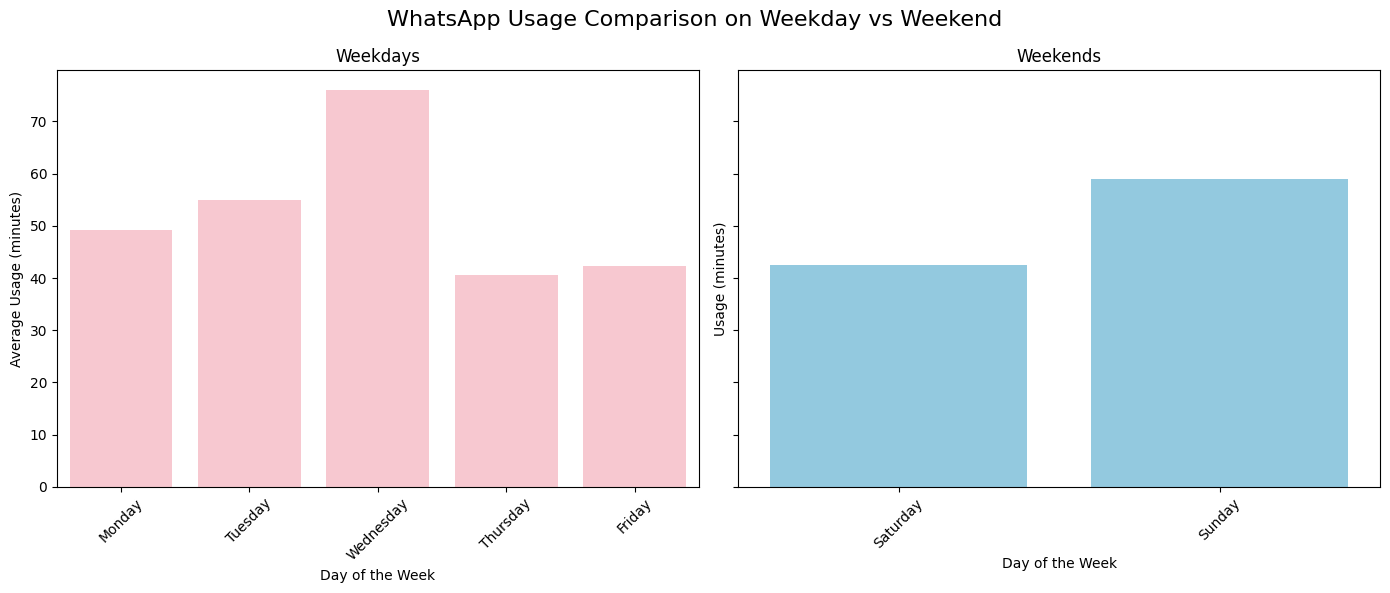

In [287]:
df_whatsapp = df[df['App']=='WhatsApp']
df_days = df_whatsapp.groupby(['is_wknd','day_of_week']).agg({'Usage (minutes)':'mean',
                                           'Notifications':'mean',
                                           'Times Opened':'mean'})
df_days.reset_index(inplace=True)
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_days['day_of_week'] = df_days['day_of_week'].map(day_names)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("WhatsApp Usage Comparison on Weekday vs Weekend", fontsize=16)
sns.barplot(data=df_days[df_days['is_wknd'] == 0], x='day_of_week', y='Usage (minutes)', ax=axes[0], color='pink')
axes[0].set_title("Weekdays")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Average Usage (minutes)")
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(data=df_days[df_days['is_wknd'] == 1], x='day_of_week', y='Usage (minutes)', ax=axes[1], color='skyblue')
axes[1].set_title("Weekends")
axes[1].set_xlabel("Day of the Week")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

From this comparsion between the screen time on weekdays and weekends for whatsapp shows us that 
people have a similar usage of whatsapp on weekends and weekdays with wednesday having the highest 
usage in the week.

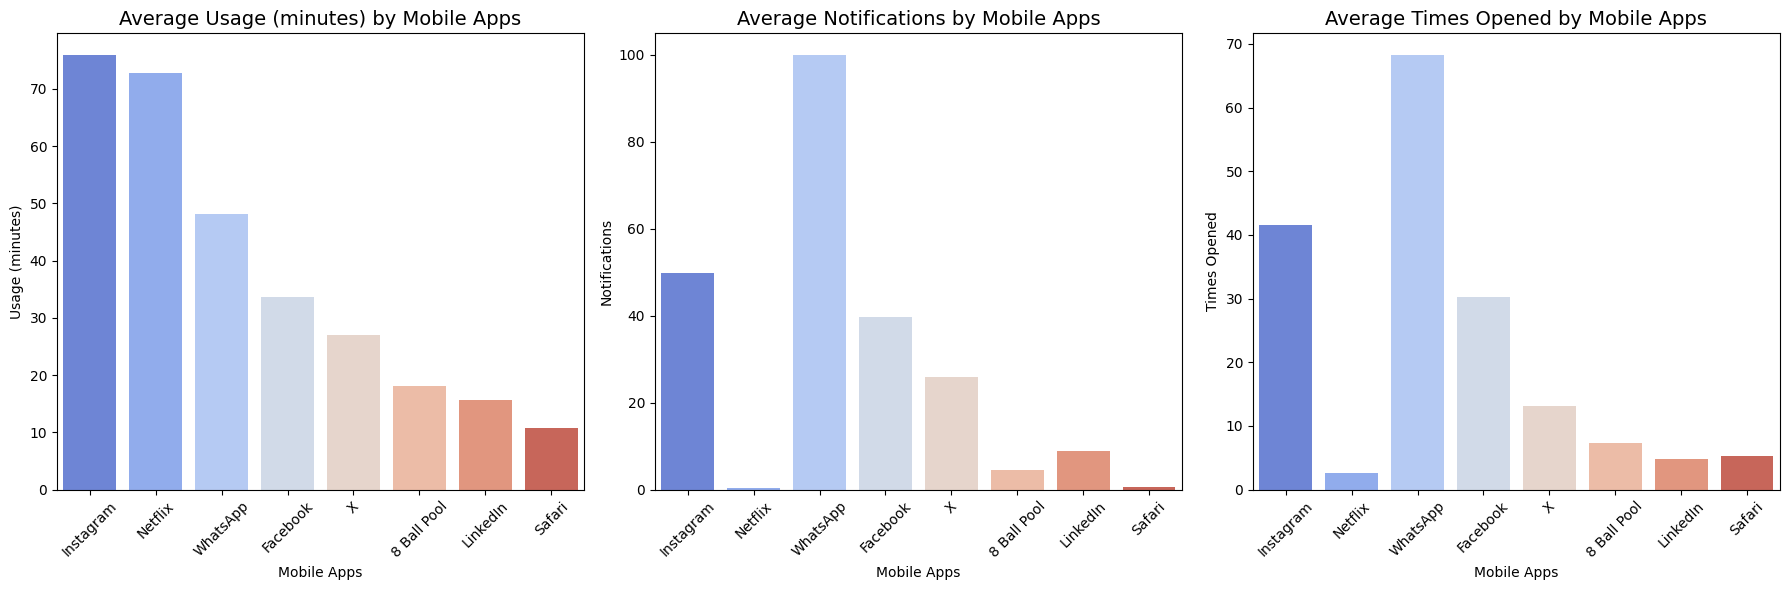

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt
df_app = df.groupby('App').agg({
    'Usage (minutes)': 'mean',
    'Notifications': 'mean',
    'Times Opened': 'mean'
}).reset_index().sort_values(by='Usage (minutes)', ascending=False)
unique_apps = df_app['App'].unique()
app_colors = {app: sns.color_palette("coolwarm", len(unique_apps))[i] for i, app in enumerate(unique_apps)}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
metrics = ['Usage (minutes)', 'Notifications', 'Times Opened']
for i, metric in enumerate(metrics):
    sns.barplot(
        data=df_app,
        x='App',
        y=metric,
        ax=axes[i],
        palette=[app_colors[app] for app in df_app['App']]
    )
    axes[i].set_title(f'Average {metric} by Mobile Apps', fontsize=14)
    axes[i].set_xlabel('Mobile Apps')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

From these usage , times opened, notifications vs different apps we can conclude that on an average 
in usage Instagram , Netflix are ussed the most, in notifications Whatsapp and then Instagram has the
highest screen time, and in average time opened again Whatsapp and instagram have the highest screen
time.